# Data Science and Business Analytics internship at The Sparks Foundation  #GRIPOCTOBER21

## TASK 7: Stock Market Prediction using Numerical and Textual Analysis

## Objective : Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headline 

### Author : Vivek Vishwanath Patil 

In [24]:
## Importing Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from datetime import datetime

In [25]:
## Reading The files 
price = pd.read_csv('BSESN.csv')
sent = pd.read_csv('india-news-headlines.csv')


In [26]:
#Changing columns to lowercase
price.columns= price.columns.str.lower()

In [27]:

#Edting Number of Diaplyed Rows and Columns

pd.set_option("display.max_rows", 99)
pd.set_option("display.max_columns", 99)


In [28]:
#Gathering info on dataset

sent.info()
type(sent.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


pandas.core.indexes.base.Index

In [29]:
#Adding Index as a column in dataset

sent['index'] = sent.index

In [30]:
sent.tail()

,publish_date,headline_category,headline_text,index
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,3297167
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,3297168
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,3297169
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,3297170
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...,3297171


In [31]:
sent.head()


,publish_date,headline_category,headline_text,index
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,0
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,1
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2
3,20010102,unknown,America's unwanted heading for India?,3
4,20010102,unknown,For bigwigs; it is destination Goa,4


In [32]:
sent['publish_date'] = sent['publish_date'].astype(str) #for ease in joining

In [33]:
price['date'] = price['date'].astype(str) #for ease in joining

In [34]:
price = price.dropna()

### Filtering the Headlines Data

In [35]:
#Filtering only Relevant Columns

filter_list = ['business', 'business.india-business', 'business.international-business', 'business.personal-finance']
sent_2 = sent[sent.headline_category.isin(filter_list)]

In [36]:

sent_2.reset_index(inplace= True)

In [37]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\Sunil
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['publish_date', 'headline_category', 'headline_text']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(sent_2, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline_text'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['publish_date'] = pd.to_datetime(parsed_and_scored_news.publish_date).dt.date

parsed_and_scored_news.head()

,publish_date,headline_category,headline_text,neg,neu,pos,compound
0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0,1.000,0.000,0.0000
1,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.0,0.588,0.412,0.6369
2,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,0.0,1.000,0.000,0.0000
3,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,0.0,1.000,0.000,0.0000
4,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0,1.000,0.000,0.0000


In [39]:
price.to_csv('price_f.csv')


In [42]:

pf = pd.read_csv('price_f.csv',index_col=0)

In [43]:

data = pf.join(parsed_and_scored_news, lsuffix='_caller', rsuffix='_other')
data.head()

,date,open,high,low,close,adj close,volume,publish_date,headline_category,headline_text,neg,neu,pos,compound
0,2020-01-02,41340.269531,41649.289063,41328.449219,41626.640625,41626.640625,5300.0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0,1.000,0.000,0.0000
1,2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.0,0.588,0.412,0.6369
2,2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,0.0,1.000,0.000,0.0000
3,2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,0.0,1.000,0.000,0.0000
4,2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0,1.000,0.000,0.0000


### Filtering Data for Analysis

In [44]:
data_f = data.drop(['headline_text', 'publish_date','headline_category'], axis = 1)
data_f.head()

,date,open,high,low,close,adj close,volume,neg,neu,pos,compound
0,2020-01-02,41340.269531,41649.289063,41328.449219,41626.640625,41626.640625,5300.0,0.0,1.000,0.000,0.0000
1,2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0,0.0,0.588,0.412,0.6369
2,2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0,0.0,1.000,0.000,0.0000
3,2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0,0.0,1.000,0.000,0.0000
4,2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0,0.0,1.000,0.000,0.0000


In [45]:
data_f.to_csv('data_f.csv',index=False)

In [46]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [47]:
data_f = pd.read_csv('data_f.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [48]:
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound
date,,,,,,,,,,
2020-01-02,41340.269531,41649.289063,41328.449219,41626.640625,41626.640625,5300.0,0.0,1.000,0.000,0.0000
2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0,0.0,0.588,0.412,0.6369
2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0,0.0,1.000,0.000,0.0000
2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0,0.0,1.000,0.000,0.0000
2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0,0.0,1.000,0.000,0.0000


# Analysis


**We use VAR method for prediction of stocks since we have a time series data which is multivariate in nature**

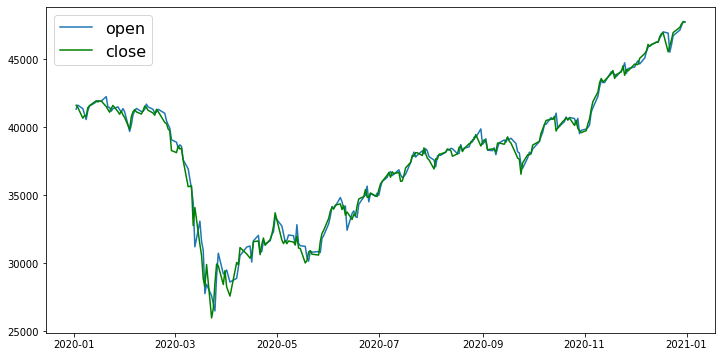

In [49]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='green')
    
plt.legend(['open', 'close'], fontsize=16)
plt.show()

### Normalize The Data

In [50]:

avgs = data_f.mean()
devs = data_f.std()

In [51]:
for col in data_f.columns:
    data_f[col] = (data_f[col] - avgs.loc[col]) / devs.loc[col]

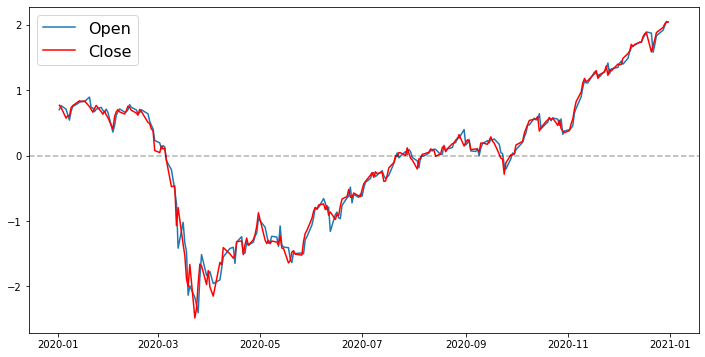

In [52]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='red')

    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['Open', 'Close'], fontsize=16)

### Taking First Difference to Remove Trend

In [53]:
data_f = data_f.diff().dropna()
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound
date,,,,,,,,,,
2020-01-03,0.061540,-0.002812,0.004124,-0.033687,-0.033687,0.219687,0.00000,-2.187597,2.865638,2.526244
2020-01-06,-0.053578,-0.055301,-0.149780,-0.163824,-0.163824,-0.012205,0.00000,2.187597,-2.865638,-2.526244
2020-01-07,-0.082677,-0.031785,0.023120,0.040092,0.040092,0.195277,0.00000,0.000000,0.000000,0.000000
2020-01-08,-0.085377,-0.078022,-0.051132,-0.010755,-0.010755,0.384452,0.00000,0.000000,0.000000,0.000000
2020-01-09,0.134241,0.132066,0.142533,0.131938,0.131938,-0.634651,1.46802,-1.104418,0.000000,-1.083639


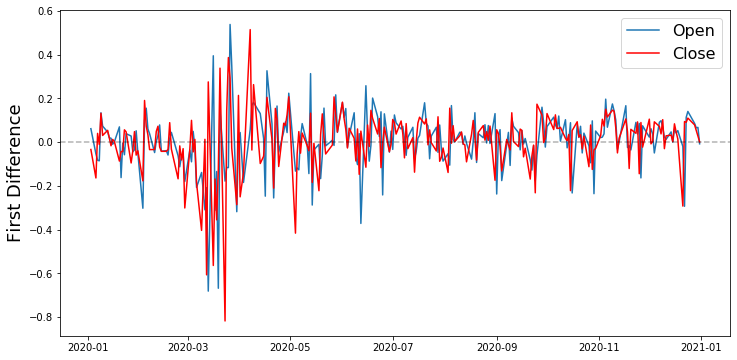

In [54]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='red')
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Open', 'Close'], fontsize=16)

### Remove Increasing Volatility

In [55]:
annual_volatility = data_f.groupby(data_f.index.year).std()
list(annual_volatility.columns)

['open',
 'high',
 'low',
 'close',
 'adj close',
 'volume',
 'neg',
 'neu',
 'pos',
 'compound']

In [56]:

data_f['open_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'open'])
data_f['close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'close'])
data_f['high_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'high'])
data_f['low_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'low'])
data_f['adj_close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'adj close'])
data_f['volume_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'volume'])
data_f['neg_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neg'])
data_f['neu_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neu'])
data_f['pos_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'pos'])
data_f['compound_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'compound'])
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol
date,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.061540,-0.002812,0.004124,-0.033687,-0.033687,0.219687,0.00000,-2.187597,2.865638,2.526244,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
2020-01-06,-0.053578,-0.055301,-0.149780,-0.163824,-0.163824,-0.012205,0.00000,2.187597,-2.865638,-2.526244,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
2020-01-07,-0.082677,-0.031785,0.023120,0.040092,0.040092,0.195277,0.00000,0.000000,0.000000,0.000000,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
2020-01-08,-0.085377,-0.078022,-0.051132,-0.010755,-0.010755,0.384452,0.00000,0.000000,0.000000,0.000000,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
2020-01-09,0.134241,0.132066,0.142533,0.131938,0.131938,-0.634651,1.46802,-1.104418,0.000000,-1.083639,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908


In [57]:
data_f['open'] = data_f['open'] / data_f['open_annual_vol']
data_f['close'] = data_f['close'] / data_f['close_annual_vol']
data_f['high'] = data_f['high'] / data_f['high_annual_vol']
data_f['low'] = data_f['low'] / data_f['low_annual_vol']
data_f['adj close'] = data_f['adj close'] / data_f['adj_close_annual_vol']
data_f['volume'] = data_f['volume'] / data_f['volume_annual_vol']
data_f['neg'] = data_f['neg'] / data_f['neg_annual_vol']
data_f['neu'] = data_f['neu'] / data_f['neu_annual_vol']
data_f['pos'] = data_f['pos'] / data_f['pos_annual_vol']
data_f['compound'] = data_f['compound'] / data_f['compound_annual_vol']


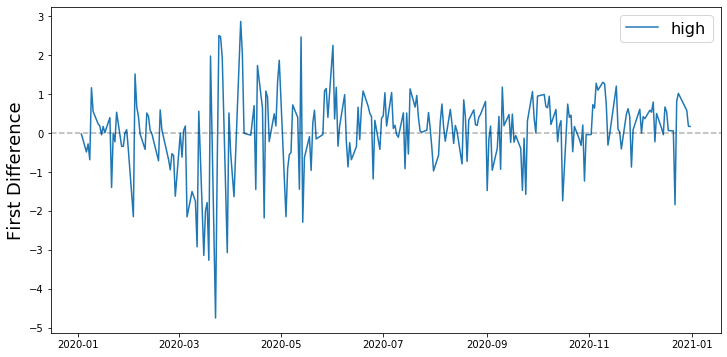

In [58]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_f['high'])
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['high'], fontsize=16)

### Removing Seasonality

In [59]:
month_avgs = data_f.groupby(data_f.index.month).mean()
month_avgs

,open,high,low,close,adj close,volume,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol
date,,,,,,,,,,,,,,,,,,,,
1,-0.014145,-0.044462,-0.050043,-0.064548,-0.064548,0.013957,7.215575e-02,-5.418705e-02,0.000000,-5.203253e-02,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
2,-0.166187,-0.205292,-0.206208,-0.191651,-0.191651,0.002986,-7.975109e-02,5.989095e-02,0.000000,5.750963e-02,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
3,-0.715075,-0.837178,-0.727129,-0.630989,-0.630989,0.030840,0.000000e+00,-1.057355e-17,0.000000,-2.114711e-17,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
4,0.348120,0.431541,0.416279,0.354296,0.354296,-0.013919,0.000000e+00,-7.484222e-02,0.097655,6.651981e-02,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
5,-0.108142,-0.139713,-0.128815,-0.102178,-0.102178,0.039809,1.180831e-01,-1.777409e-02,-0.092515,-1.116709e-01,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
6,0.217963,0.236170,0.217176,0.169986,0.169986,-0.039967,-1.019808e-01,4.171290e-02,0.045501,9.644301e-02,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
7,0.178655,0.218557,0.182011,0.175606,0.175606,0.003494,-1.448117e-17,3.335581e-02,-0.043523,-5.205898e-02,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
8,0.148986,0.189817,0.073394,0.072999,0.072999,0.017333,0.000000e+00,0.000000e+00,0.000000,-1.057355e-17,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908
9,-0.126808,-0.152149,-0.041254,-0.038228,-0.038228,-0.020413,0.000000e+00,1.009294e-17,0.000000,4.037175e-17,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908


In [60]:
data_f['open_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'open'])
data_f['close_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'close'])
data_f['high_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'high'])
data_f['low_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'low'])
data_f['adj_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'adj close'])
data_f['volume_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'volume'])
data_f['neg_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'neg'])
data_f['neu_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'neu'])
data_f['pos_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'pos'])
data_f['compound_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'compound'])


In [61]:
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol,open_month_avg,close_month_avg,high_month_avg,low_month_avg,adj_month_avg,volume_month_avg,neg_month_avg,neu_month_avg,pos_month_avg,compound_month_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.451212,-0.024738,0.032338,-0.243186,-0.243186,0.170182,0.000000,-1.512343,1.973318,1.731599,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033
2020-01-06,-0.392832,-0.486553,-1.174438,-1.182646,-1.182646,-0.009455,0.000000,1.512343,-1.973318,-1.731599,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033
2020-01-07,-0.606183,-0.279657,0.181285,0.289425,0.289425,0.151273,0.000000,0.000000,0.000000,0.000000,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033
2020-01-08,-0.625980,-0.686468,-0.400933,-0.077640,-0.077640,0.297818,0.000000,0.000000,0.000000,0.000000,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033
2020-01-09,0.984249,1.161964,1.117610,0.952463,0.952463,-0.491636,1.016698,-0.763513,0.000000,-0.742774,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033


In [63]:
data_f['open'] = data_f['open'] - data_f['open_month_avg']
data_f['close'] = data_f['close'] - data_f['close_month_avg']
data_f['high'] = data_f['high'] - data_f['high_month_avg']
data_f['low'] = data_f['low'] - data_f['low_month_avg']
data_f['adj close'] = data_f['adj close'] - data_f['adj_month_avg']
data_f['volume'] = data_f['volume'] - data_f['volume_month_avg']
data_f['neg'] = data_f['neg'] - data_f['neg_month_avg']
data_f['neu'] = data_f['neu'] - data_f['neu_month_avg']
data_f['pos'] = data_f['pos'] - data_f['pos_month_avg']
data_f['compound'] = data_f['compound'] - data_f['compound_month_avg']


In [62]:
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol,open_month_avg,close_month_avg,high_month_avg,low_month_avg,adj_month_avg,volume_month_avg,neg_month_avg,neu_month_avg,pos_month_avg,compound_month_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.451212,-0.024738,0.032338,-0.243186,-0.243186,0.170182,0.000000,-1.512343,1.973318,1.731599,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033
2020-01-06,-0.392832,-0.486553,-1.174438,-1.182646,-1.182646,-0.009455,0.000000,1.512343,-1.973318,-1.731599,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033
2020-01-07,-0.606183,-0.279657,0.181285,0.289425,0.289425,0.151273,0.000000,0.000000,0.000000,0.000000,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033
2020-01-08,-0.625980,-0.686468,-0.400933,-0.077640,-0.077640,0.297818,0.000000,0.000000,0.000000,0.000000,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033
2020-01-09,0.984249,1.161964,1.117610,0.952463,0.952463,-0.491636,1.016698,-0.763513,0.000000,-0.742774,0.136389,0.138523,0.113658,0.127534,0.138523,1.290896,1.44391,1.446495,1.452193,1.458908,-0.014145,-0.064548,-0.044462,-0.050043,-0.064548,0.013957,0.072156,-0.054187,0.0,-0.052033


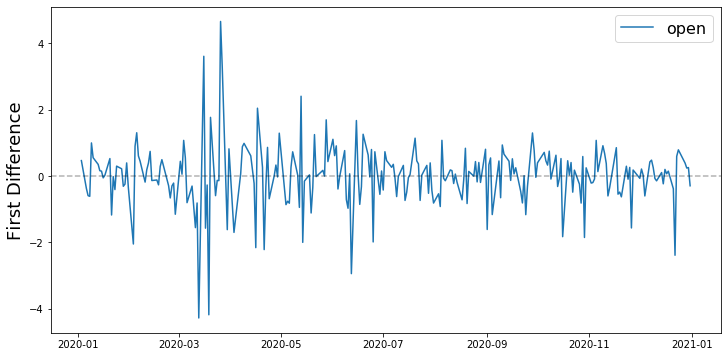

In [64]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])

plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['open'], fontsize=16)

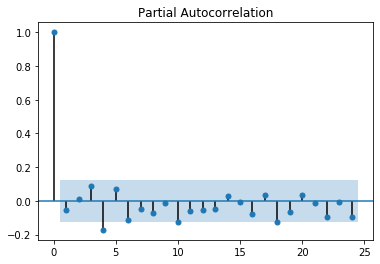

In [65]:

plot_pacf(data_f['high'])
plt.show()

### Fitting a VAR Model

In [66]:
data_f1 = data_f.loc[:,['open' ,'close', 'high', 'low', 'adj close' ,'volume','neg', 'neu' ,'pos' ,'compound']]

data_f2 = data_f1.dropna()
data_f2.isnull().sum()

open         0
close        0
high         0
low          0
adj close    0
volume       0
neg          0
neu          0
pos          0
compound     0
dtype: int64

In [69]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 20, Feb, 2021
Time:                     11:41:06
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -57.6844
Nobs:                     246.000    HQIC:                  -59.4718
Log likelihood:           4182.65    FPE:                4.46940e-27
AIC:                     -60.6767    Det(Omega_mle):     2.00805e-27
--------------------------------------------------------------------
Results for equation open
                  coefficient            std. error           t-stat            prob
------------------------------------------------------------------------------------
const               -0.002789              0.041199           -0.068           0.946
L1.open             -0.481558              0.126791           -3.798           0.000
L1.close             0.468157                